In [1]:
import scanpy as sc
from anndata import AnnData
import numpy as np
# import requires setting a PYTHONPATH with the data_import directory
import h5ad_preparation as prep
import pandas as pd

20230111-081342.911 9772 INFO root:17 local study files stored in: /home/mahmoud_ibrahim/code/cellenium/scratch


In [2]:
url = "https://figshare.com/ndownloader/files/23872484"
adata = prep.get_h5ad_from_url(url, "tabula_muris_senis_kidney")

  0%|          | 0.00/60.5M [00:00<?, ?B/s]

/home/mahmoud_ibrahim/.local/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/mahmoud_ibrahim/.local/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [3]:
prep.jupyter_h5ad_overview(adata)

,FACS.selection,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,sex,subtissue,tissue,n_genes,n_counts,louvain,leiden
index,,,,,,,,,,,,,,,
A12_B002350_B009947_S12.mm10-plus-4-0,Viable,18m,A12_B002350,epithelial cell of proximal tubule,nan,epithelial cell of proximal tubule,facs,18_46_F,female,nan,Kidney,838,391355.0,6,2
A12_B002352_B009948_S12.mm10-plus-4-0,Viable,18m,A12_B002352,epithelial cell of proximal tubule,nan,epithelial cell of proximal tubule,facs,18_47_F,female,nan,Kidney,2306,1330133.0,11,11
A13_B002697_B009938_S13.mm10-plus-4-0,Viable,18m,A13_B002697,epithelial cell of proximal tubule,nan,epithelial cell of proximal tubule,facs,18_53_M,male,nan,Kidney,930,134686.0,3,1
A15_B002352_B009948_S15.mm10-plus-4-0,Viable,18m,A15_B002352,kidney collecting duct epithelial cell,nan,kidney collecting duct epithelial cell,facs,18_47_F,female,nan,Kidney,3547,1790301.0,11,11
A16_B002352_B009948_S16.mm10-plus-4-0,Viable,18m,A16_B002352,epithelial cell of proximal tubule,nan,epithelial cell of proximal tubule,facs,18_47_F,female,nan,Kidney,1658,1727018.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P4.MAA000801.3_11_M.1.1-1-1,nan,3m,P4.MAA000801.3_11_M.1.1,macrophage,CL:0000235,macrophage,facs,3_11_M,male,nan,Kidney,3124,1263701.0,5,12
P5.MAA000545.3_8_M.1.1-1-1,nan,3m,P5.MAA000545.3_8_M.1.1,epithelial cell of proximal tubule,CL:0002306,epithelial cell of proximal tubule,facs,3_8_M,male,nan,Kidney,1419,337442.0,6,2
P6.MAA000801.3_11_M.1.1-1-1,nan,3m,P6.MAA000801.3_11_M.1.1,fenestrated cell,CL:0000115,fenestrated cell,facs,3_11_M,male,nan,Kidney,2178,663581.0,7,3


,n_cells,means,dispersions,dispersions_norm,highly_variable
index,,,,,
0610005C13Rik,3939,0.976980,2.545933,-0.199323,False
0610007C21Rik,61891,1.121900,3.934652,1.550666,True
0610007L01Rik,36115,0.278381,1.870253,0.369994,False
0610007N19Rik,19591,0.192434,1.834338,0.350685,False
0610007P08Rik,12581,0.069291,2.176712,0.534759,True
...,...,...,...,...,...
Zyg11a,276,0.000005,-4.615427,-3.116970,False
Zyg11b,23165,0.156389,1.933248,0.403863,False
Zyx,58021,0.533792,2.170801,-0.522704,False


(1833, 22966)

<1833x22966 sparse matrix of type '<class 'numpy.float32'>'
	with 3137161 stored elements in Compressed Sparse Row format>

(1833, 22966)

OverloadedDict, wrapping:
	{'age_colors': array(['#e1f3b2', '#97d6b9', '#1f80b8'], dtype=object), 'cell_ontology_class_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8'], dtype=object), 'leiden': {'params': {'n_iterations': array([-1]), 'random_state': array([0]), 'resolution': array([1])}}, 'louvain': {'params': {'random_state': array([0])}}, 'neighbors': {'params': {'method': array(['umap'], dtype=object), 'metric': array(['euclidean'], dtype=object), 'n_neighbors': array([15]), 'n_pcs': array([5])}}, 'pca': {'variance': array([102.08011  ,  79.006355 ,  47.017376 ,  43.971405 ,  42.489193 ,
        36.794746 ,  34.402412 ,  30.529222 ,  24.026789 ,  17.922113 ,
        16.679247 ,  15.016808 ,  13.98399  ,  13.657072 ,  12.984077 ,
        12.568902 ,  11.781793 ,  11.384113 ,  10.683404 ,   9.785175 ,
         9.753737 ,   9.383629 ,   8.883428 ,   8.832221 ,   8.59117  ,
         8.442217 ,   8.36625

20230111-081345.425 9772 INFO root:118 make_norm_expression: no transformations necessary


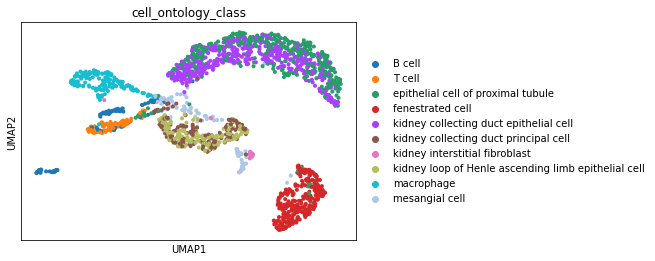

In [4]:
prep.remove_raw_and_layers(adata)
prep.make_sparse(adata)
prep.filter_outliers(adata)
prep.make_norm_expression(adata)

prep.add_umap(adata)
sc.pl.umap(adata, color='cell_ontology_class')

In [5]:
prep.calculate_differentially_expressed_genes(adata, ['cell_ontology_class','free_annotation','louvain','leiden'])

diff.exp. genes: 100%|██████████| 4/4 [00:11<00:00,  2.94s/it]
20230111-081357.475 9772 INFO root:278 calculate_differentially_expressed_genes: found a list of genes for these attributes: ['cell_ontology_class', 'free_annotation', 'louvain', 'leiden']


,names,scores,logfoldchanges,pvals,pvals_adj,ref_attr_value,cmp_attr_value,attribute_name
0,Gatm,29.139608,5.212463,1.131331e-186,1.852103e-182,kidney collecting duct epithelial cell,_OTHERS_,cell_ontology_class
1,Gpx3,28.595243,3.023159,7.699065e-180,6.302070e-176,kidney collecting duct epithelial cell,_OTHERS_,cell_ontology_class
2,Miox,27.442753,3.634763,8.478774e-166,4.626867e-162,kidney collecting duct epithelial cell,_OTHERS_,cell_ontology_class
3,Slc34a1,25.722122,3.488498,6.612611e-146,2.706376e-142,kidney collecting duct epithelial cell,_OTHERS_,cell_ontology_class
4,Aldob,25.281300,3.079055,5.129606e-141,1.679536e-137,kidney collecting duct epithelial cell,_OTHERS_,cell_ontology_class
...,...,...,...,...,...,...,...,...
5049,Lcp1,7.099862,4.477244,1.248820e-12,2.107674e-10,16,_OTHERS_,leiden
5050,Gimap3,7.097436,5.858218,1.270929e-12,2.123100e-10,16,_OTHERS_,leiden
5051,Strap,7.077097,4.493338,1.472054e-12,2.434242e-10,16,_OTHERS_,leiden
5052,Golgb1,7.054893,5.641033,1.727342e-12,2.818680e-10,16,_OTHERS_,leiden


# final h5ad file

In [6]:
prep.set_cellenium_metadata(
    adata,
    title='Tabula Muris Senis Kidney',
    description='Mouse kidney dataset from the Tabula Muris Senis Consortium',
    taxonomy_id=10090,
    ncit_tissue_ids=['C12415'],
    mesh_disease_ids=[],
    X_pseudolayer_name='norm_log_expression',
    main_sample_attributes=['cell_ontology_class', 'free_annotation']
)   

In [7]:
adata.write(prep.basedir.joinpath("tabula_sapiens_kidney.h5ad"))
prep.jupyter_h5ad_overview(adata)

,FACS.selection,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,sex,subtissue,tissue,n_genes,n_counts,louvain,leiden
index,,,,,,,,,,,,,,,
A12_B002350_B009947_S12.mm10-plus-4-0,Viable,18m,A12_B002350,epithelial cell of proximal tubule,nan,epithelial cell of proximal tubule,facs,18_46_F,female,nan,Kidney,838,391355.0,6,2
A12_B002352_B009948_S12.mm10-plus-4-0,Viable,18m,A12_B002352,epithelial cell of proximal tubule,nan,epithelial cell of proximal tubule,facs,18_47_F,female,nan,Kidney,2306,1330133.0,11,11
A13_B002697_B009938_S13.mm10-plus-4-0,Viable,18m,A13_B002697,epithelial cell of proximal tubule,nan,epithelial cell of proximal tubule,facs,18_53_M,male,nan,Kidney,930,134686.0,3,1
A15_B002352_B009948_S15.mm10-plus-4-0,Viable,18m,A15_B002352,kidney collecting duct epithelial cell,nan,kidney collecting duct epithelial cell,facs,18_47_F,female,nan,Kidney,3547,1790301.0,11,11
A16_B002352_B009948_S16.mm10-plus-4-0,Viable,18m,A16_B002352,epithelial cell of proximal tubule,nan,epithelial cell of proximal tubule,facs,18_47_F,female,nan,Kidney,1658,1727018.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P4.MAA000801.3_11_M.1.1-1-1,nan,3m,P4.MAA000801.3_11_M.1.1,macrophage,CL:0000235,macrophage,facs,3_11_M,male,nan,Kidney,3124,1263701.0,5,12
P5.MAA000545.3_8_M.1.1-1-1,nan,3m,P5.MAA000545.3_8_M.1.1,epithelial cell of proximal tubule,CL:0002306,epithelial cell of proximal tubule,facs,3_8_M,male,nan,Kidney,1419,337442.0,6,2
P6.MAA000801.3_11_M.1.1-1-1,nan,3m,P6.MAA000801.3_11_M.1.1,fenestrated cell,CL:0000115,fenestrated cell,facs,3_11_M,male,nan,Kidney,2178,663581.0,7,3


,n_cells,means,dispersions,dispersions_norm,highly_variable
index,,,,,
0610005C13Rik,489,0.976980,2.545933,-0.199323,False
0610007C21Rik,773,1.121900,3.934652,1.550666,True
0610007L01Rik,272,0.278381,1.870253,0.369994,False
0610007N19Rik,352,0.192434,1.834338,0.350685,False
0610007P08Rik,72,0.069291,2.176712,0.534759,True
...,...,...,...,...,...
Zxdc,112,0.144013,1.910745,0.391765,False
Zyg11b,163,0.156389,1.933248,0.403863,False
Zyx,455,0.533792,2.170801,-0.522704,False


(1833, 16371)

<1833x16371 sparse matrix of type '<class 'numpy.float32'>'
	with 3134524 stored elements in Compressed Sparse Row format>

OverloadedDict, wrapping:
	{'age_colors': array(['#e1f3b2', '#97d6b9', '#1f80b8'], dtype=object), 'cell_ontology_class_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8'], dtype=object), 'leiden': {'params': {'n_iterations': array([-1]), 'random_state': array([0]), 'resolution': array([1])}}, 'louvain': {'params': {'random_state': array([0])}}, 'neighbors': {'params': {'method': array(['umap'], dtype=object), 'metric': array(['euclidean'], dtype=object), 'n_neighbors': array([15]), 'n_pcs': array([5])}}, 'pca': {'variance': array([102.08011  ,  79.006355 ,  47.017376 ,  43.971405 ,  42.489193 ,
        36.794746 ,  34.402412 ,  30.529222 ,  24.026789 ,  17.922113 ,
        16.679247 ,  15.016808 ,  13.98399  ,  13.657072 ,  12.984077 ,
        12.568902 ,  11.781793 ,  11.384113 ,  10.683404 ,   9.785175 ,
         9.753737 ,   9.383629 ,   8.883428 ,   8.832221 ,   8.59117  ,
         8.442217 ,   8.36625